# Build a model to predict the price of Cryptocurrency for the next 30 days.





# Objective: -

You must have heard or invested in any cryptocurrency once in your life. It is a digital medium of exchange that is encrypted and decentralized. Many people use cryptocurrencies as a form of investing because it gives great returns even in a short period. Bitcoin, Ethereum, and Binance Coin are among the popular cryptocurrencies today.
Predicting the price of cryptocurrencies is one of the popular case studies in the data science community. The prices of stocks and cryptocurrencies don’t just depend on the number of people who buy or sell them. Today, the change in the prices of these investments also depends on the changes in the financial policies of the government regarding any cryptocurrency. The feelings of people towards a particular cryptocurrency or personality who directly or indirectly endorse a cryptocurrency also result in a huge buying and selling of a particular cryptocurrency, resulting in a change in prices.

The goal of this challenge is to build a machine learning model that predict the price of Cryptocurrency for the next 30 days.

# Dataset: -

The dataset used in this model is publicly available on yfinance python module.

Attribute Information:
 - Close 

**Three real-valued features:**

1. Open
2. Low
3. High
4. Adj Volume
5. Volume
6. Date

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
- __AutoTs__ : AutoTS is a time series package for Python designed for rapidly deploying high-accuracy forecasts at scale. There are dozens of forecasting models usable in the sklearn style of . fit() and . predict() . These includes naive, statistical, machine learning, and deep learning models.
- __yfinance__ : The yfinance is one of the famous modules in Python, which is used to collect online data, and with it, we can collect the financial data of Yahoo. With the help of the yfinance module, we retrieve and collect the company's financial information (such as financial ratios, etc.)

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
import datetime
from datetime import date, timedelta
warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/CryptoCurrency_price_prediction/data/Cryptocurrency.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")  

Data read done successfully...


In [3]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [4]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-15,48696.535156,48875.570312,46347.476562,47945.058594,47945.058594,77069903166
1,2021-02-16,47944.457031,50341.101562,47201.304688,49199.871094,49199.871094,77049582886
2,2021-02-17,49207.277344,52533.914062,49072.378906,52149.007812,52149.007812,80820545404
3,2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579
4,2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

By analysing the first five rows we found that there is a column named Date, it has the combination of categorical and numerical value which of no use so we will drop it.

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [5]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 730 rows and 7 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "column" column which shows the closing price for the stock.

In [6]:
df['Close'].value_counts()

47945.058594    1
30111.998047    1
28360.810547    1
26762.648438    1
22487.388672    1
               ..
62026.078125    1
64261.992188    1
65992.835938    1
62210.171875    1
22220.804688    1
Name: Close, Length: 730, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [7]:
df.shape

(730, 7)

#### The df.shape method shows the shape of the dataset. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       730 non-null    object 
 1   Open       730 non-null    float64
 2   High       730 non-null    float64
 3   Low        730 non-null    float64
 4   Close      730 non-null    float64
 5   Adj Close  730 non-null    float64
 6   Volume     730 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.0+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [9]:
df.iloc[1]

Date           2021-02-16
Open         47944.457031
High         50341.101562
Low          47201.304688
Close        49199.871094
Adj Close    49199.871094
Volume        77049582886
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['Date']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['Volume']


In [14]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [15]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['Open', 'High', 'Low', 'Close', 'Adj Close']


## Step 2 Insights: -

1) We have total 6 features where 1 of them is integer type and 5 float type. 

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,36870.813209,37738.201439,35850.262719,36829.156007,36829.156007,3.563867e+10
std,14414.337389,14803.576539,13956.465958,14411.116701,14411.116701,1.969175e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,21606.353027,21893.161133,21077.513672,21610.075195,21610.075195,2.517628e+10
50%,38249.306641,39396.177734,37222.894531,38145.580078,38145.580078,3.175161e+10
75%,47760.067383,49143.086914,46734.351562,47701.291016,47701.291016,4.078446e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

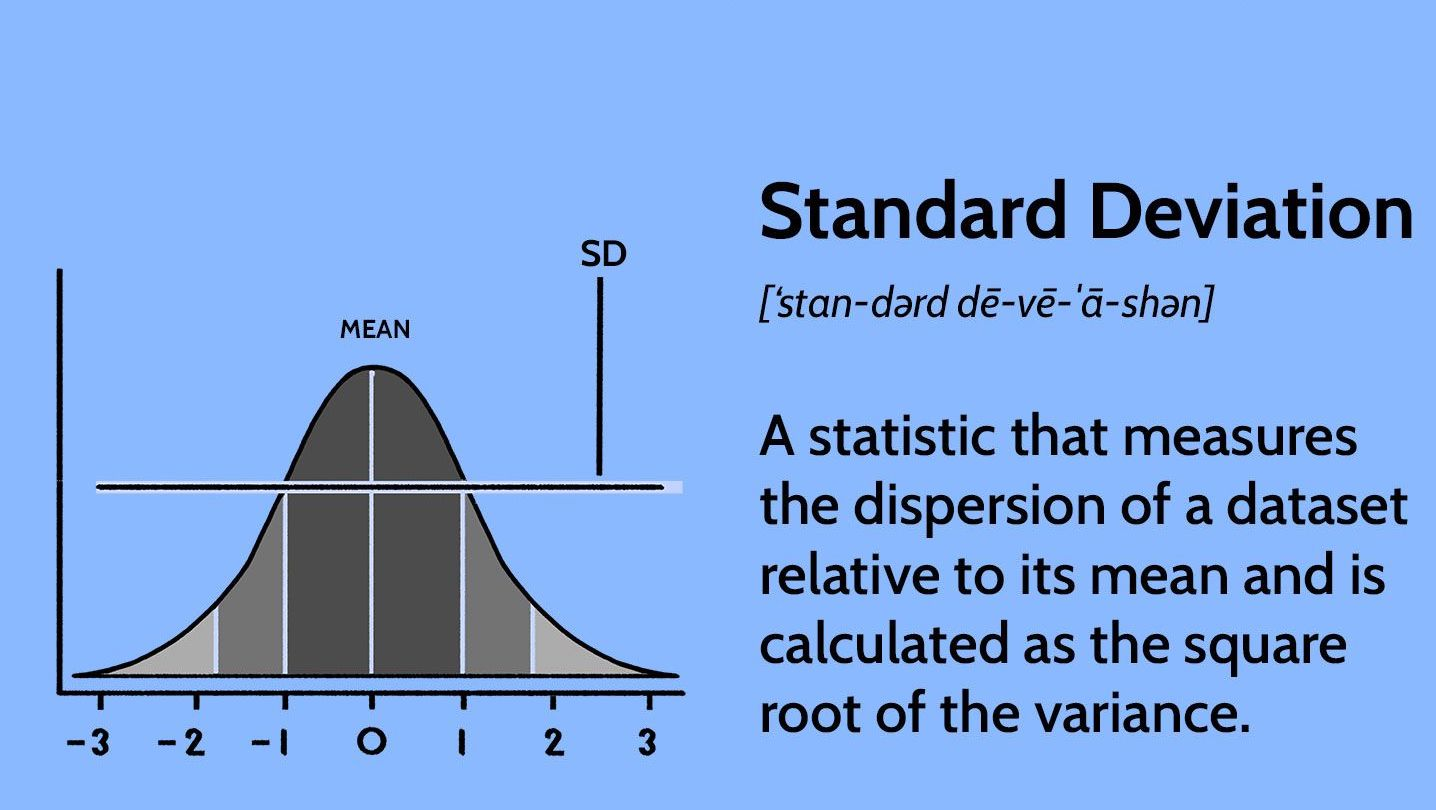

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [17]:
df.std()

Open         1.441434e+04
High         1.480358e+04
Low          1.395647e+04
Close        1.441112e+04
Adj Close    1.441112e+04
Volume       1.969175e+10
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [18]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

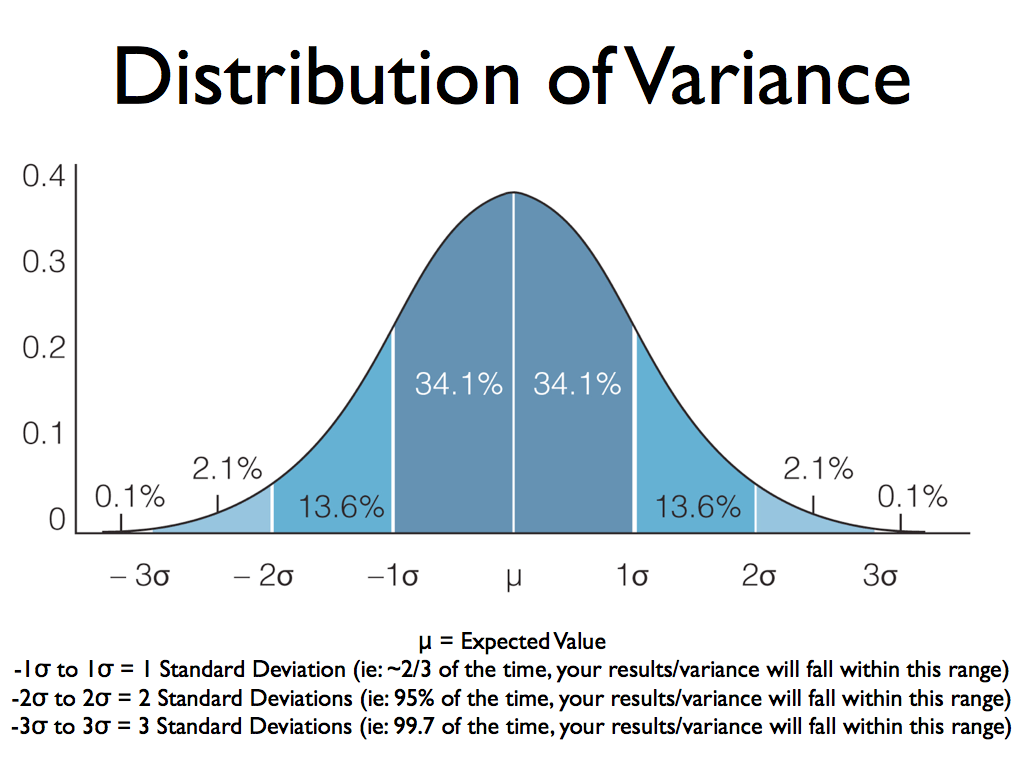

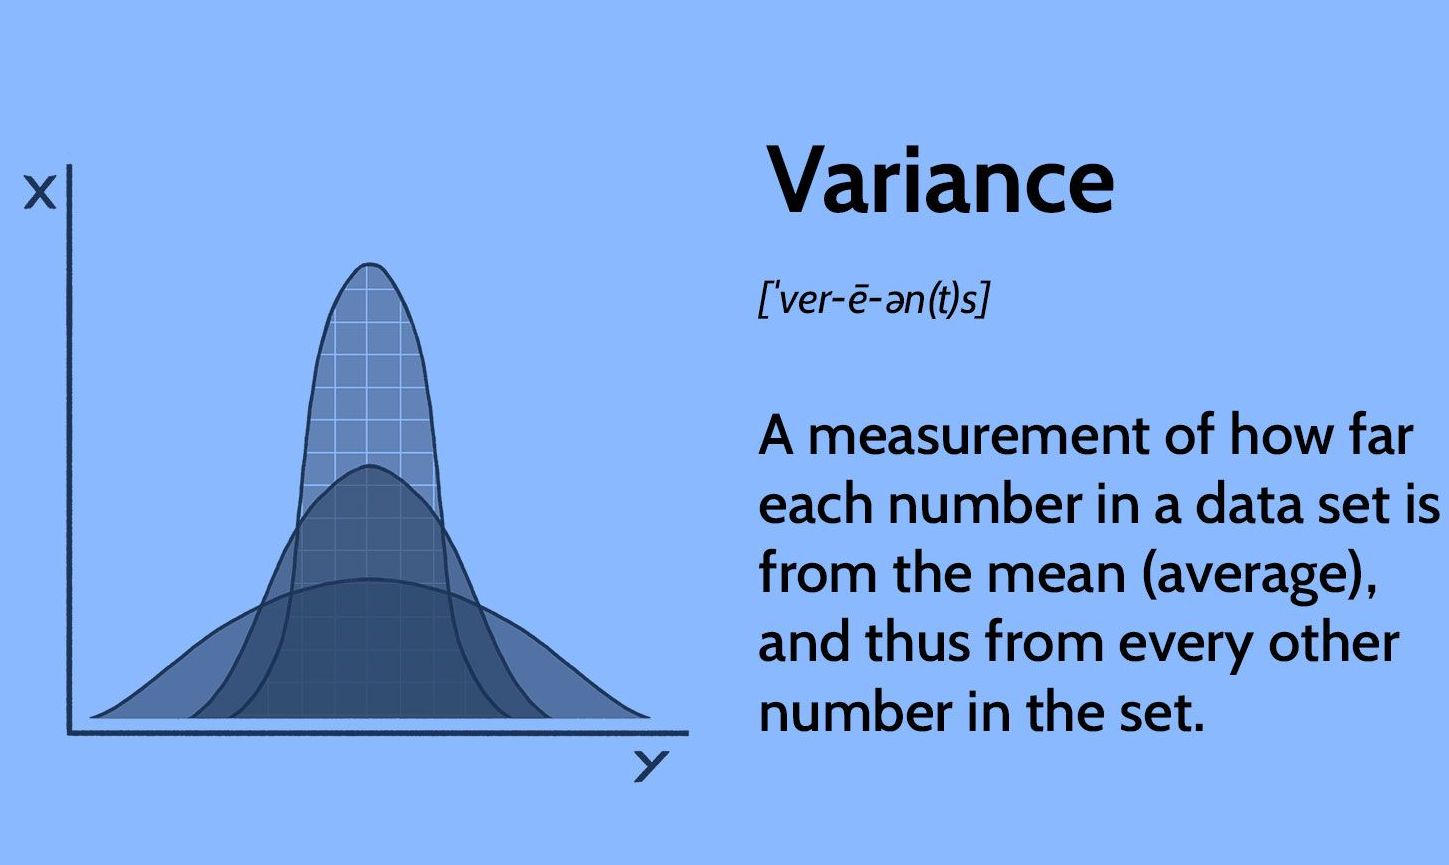

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [19]:
df.var()

Open         2.077731e+08
High         2.191459e+08
Low          1.947829e+08
Close        2.076803e+08
Adj Close    2.076803e+08
Volume       3.877651e+20
dtype: float64

#### We can also understand the Variance using the below function.

In [20]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

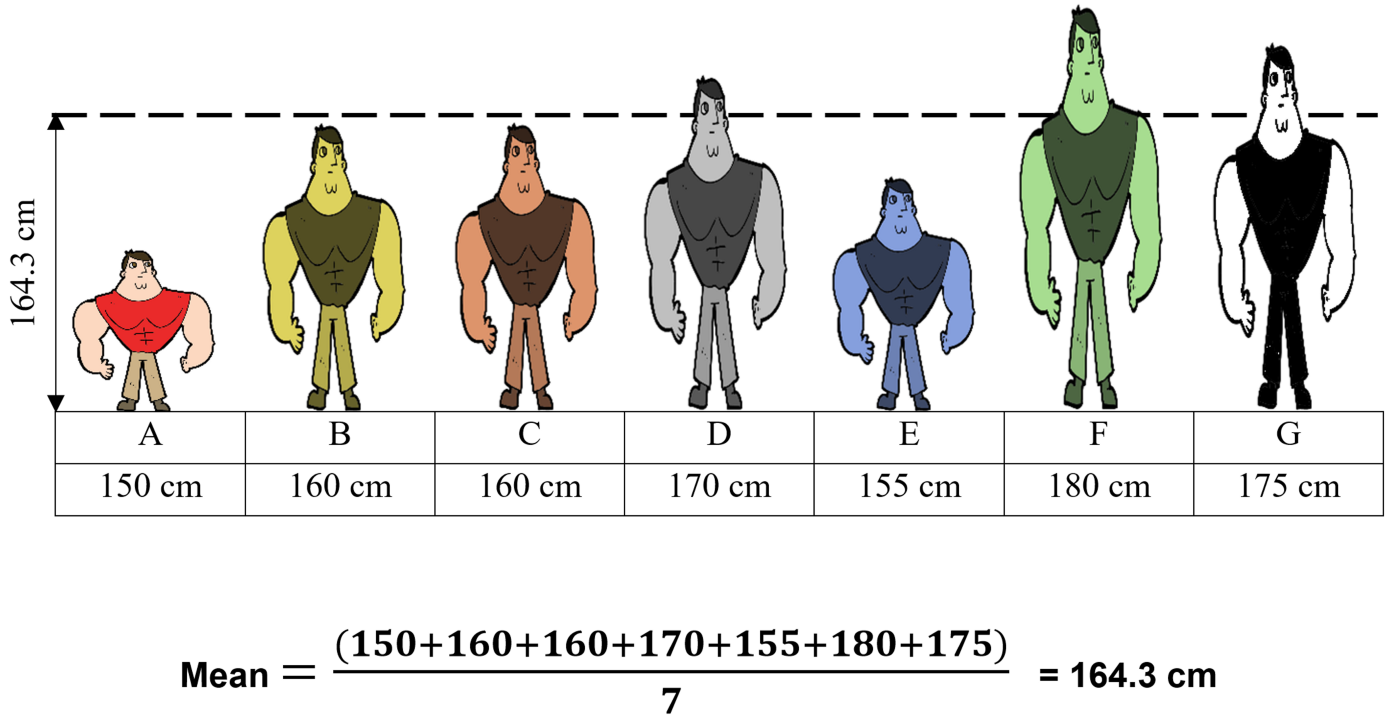

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [21]:
df.mean()

Open         3.687081e+04
High         3.773820e+04
Low          3.585026e+04
Close        3.682916e+04
Adj Close    3.682916e+04
Volume       3.563867e+10
dtype: float64

#### We can also understand the mean using the below function. 

In [22]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

# 2.Median
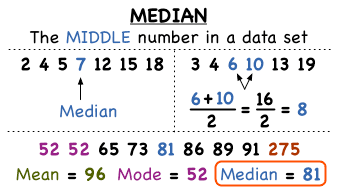

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [23]:
df.median()

Open         3.824931e+04
High         3.939618e+04
Low          3.722289e+04
Close        3.814558e+04
Adj Close    3.814558e+04
Volume       3.175161e+10
dtype: float64

####  We can also understand the median using the below function. 

In [24]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

# 3. Mode
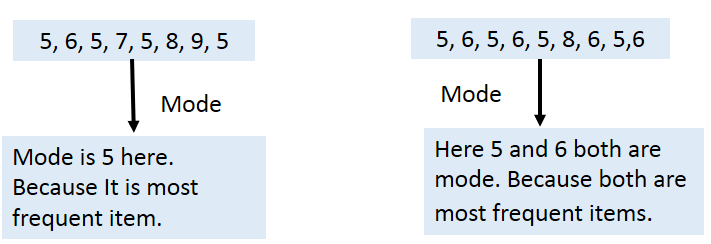
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [25]:
df.mode()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-15,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7714767174
1,2021-02-16,15883.158203,16291.223633,15656.606445,15880.780273,15880.780273,9244361700
2,2021-02-17,16195.588867,16482.933594,15682.692383,16189.769531,16189.769531,9744636213
3,2021-02-18,16217.639648,16522.257812,15834.018555,16217.322266,16217.322266,9768827914
4,2021-02-19,16291.223633,16594.406250,15872.941406,16291.832031,16291.832031,10924354698
...,...,...,...,...,...,...,...
725,2023-02-10,64978.890625,66600.546875,63548.144531,64995.230469,64995.230469,102905151606
726,2023-02-11,65521.289062,66930.390625,63610.675781,65466.839844,65466.839844,106102492824
727,2023-02-12,66002.234375,67673.742188,63647.808594,65992.835938,65992.835938,118992465607
728,2023-02-13,66953.335938,68530.335938,64180.488281,66971.828125,66971.828125,126358098747


In [26]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

# Null and Nan values

1. **Null Values**


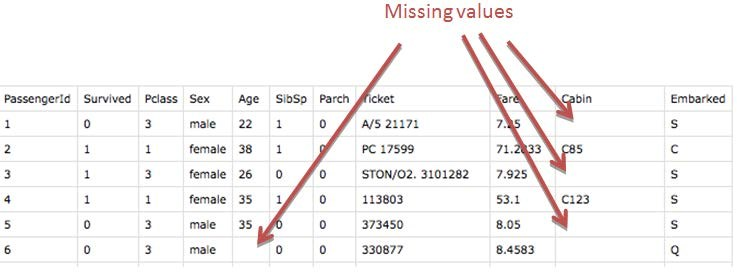

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [27]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

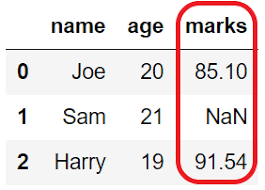

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [28]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Skewness 

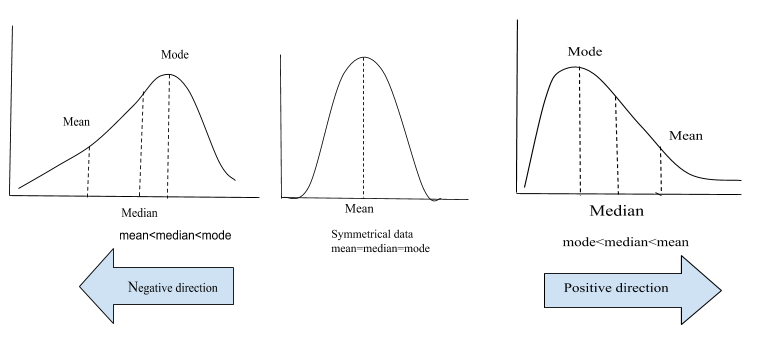

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [29]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [30]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [31]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Open,0.1299,positive (+ve) skewed
1,High,0.1142,positive (+ve) skewed
2,Low,0.1525,positive (+ve) skewed
3,Close,0.1346,positive (+ve) skewed
4,Adj Close,0.1346,positive (+ve) skewed


In [32]:
skew_total_df


,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,5,0,0


We notice with the above results that we have following details:
1. All columns are positive skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Scatter plot to find out relation between two variables.

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

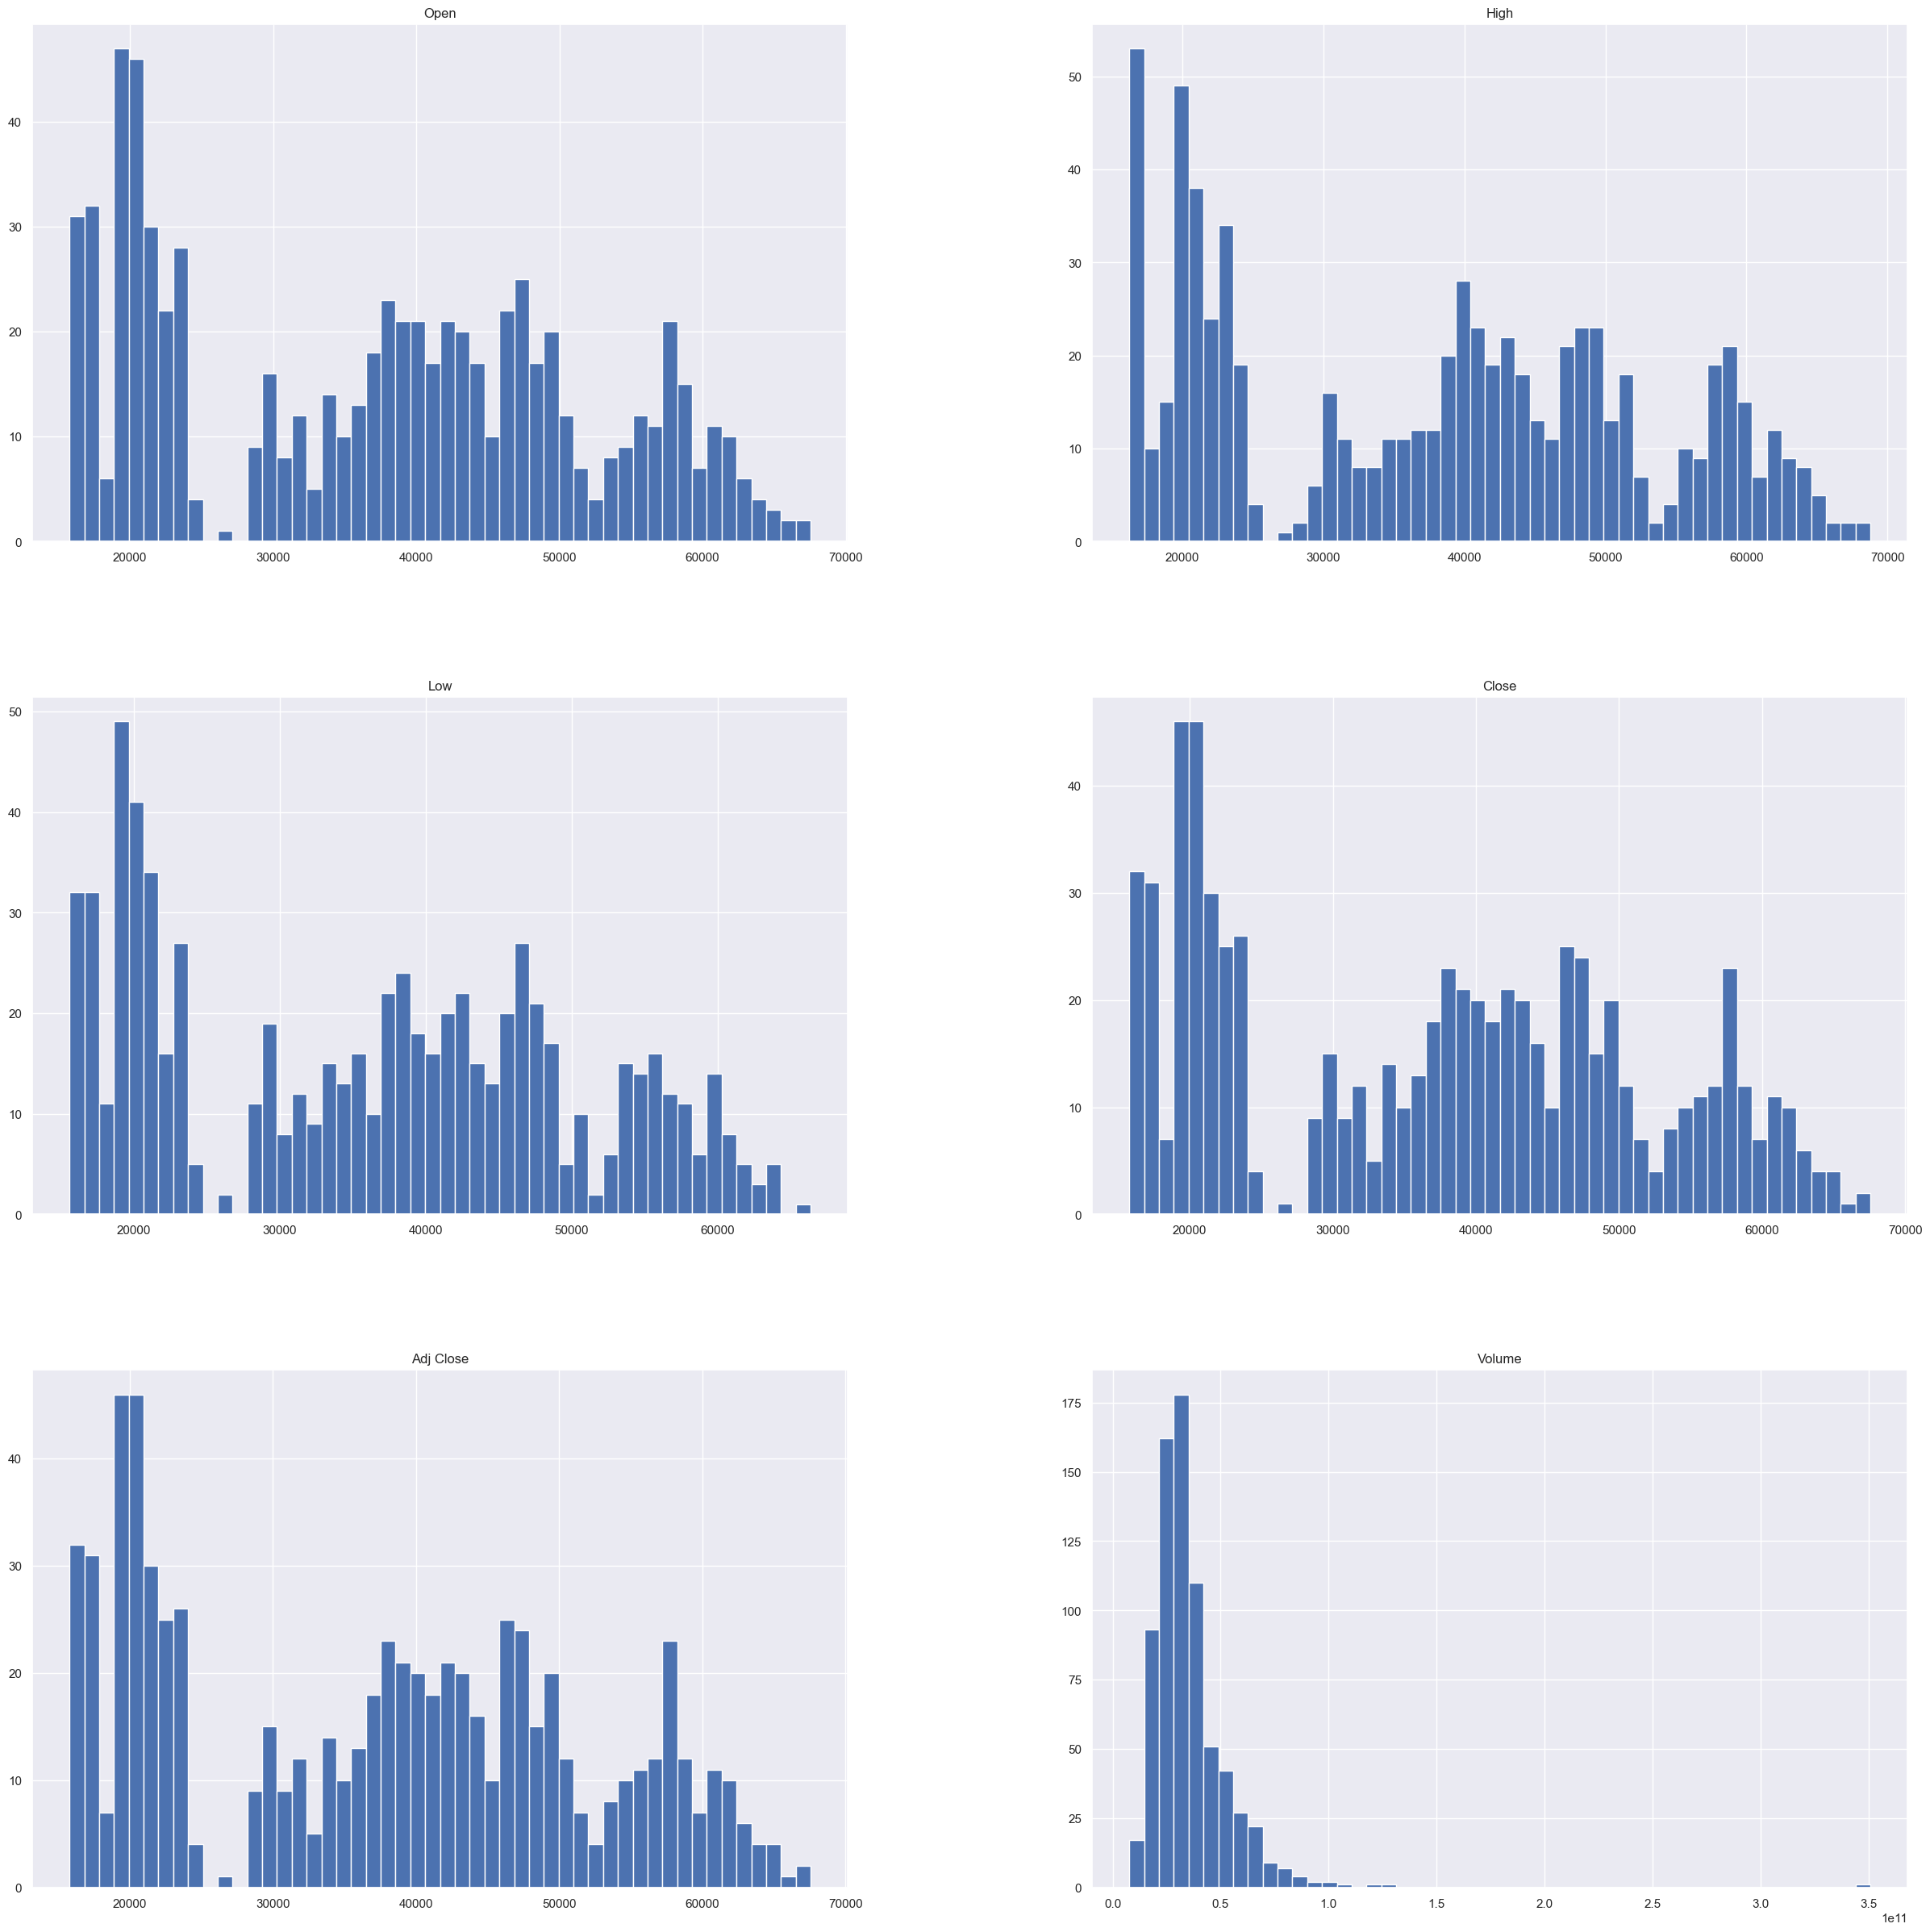

In [44]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

In [45]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

#### The above graph shows the growth of the price of Cryptocurrency. We can observe that in April 2021 the starting was very good but in the month of July 2021 it goes drastically down which caused a high amount of loss to th investor and from August to December 2021 it goes high again and made a high profit for the investors.


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

- We can observe that the number of daily deaths were highest in between the months April 2021 to July 2021. 

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

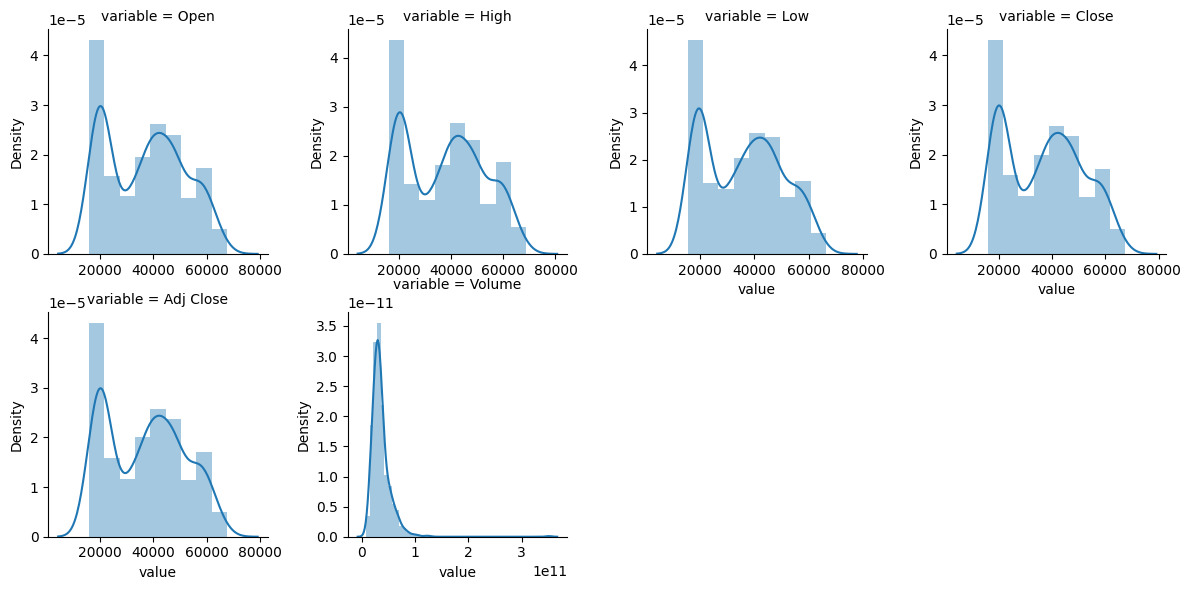

In [36]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. All columns are positive skewed
2. 1 column is added here i.e Close which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [37]:
#+ve skewed 
df['Close'].skew()

0.13463581703353275

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



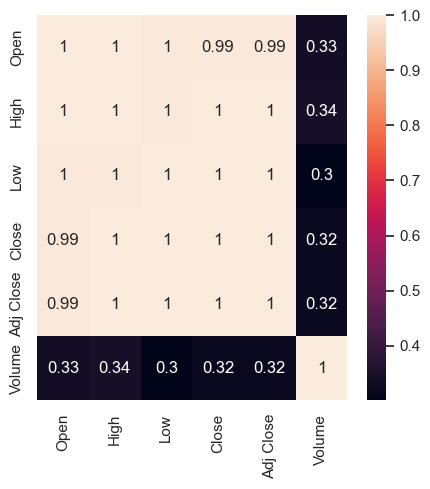

In [38]:
#correlation plot
sns.set(rc = {'figure.figsize':(5,5)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [40]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998193,0.996177,0.994935,0.994935,0.334945
High,0.998193,1.000000,0.996096,0.997638,0.997638,0.344142
Low,0.996177,0.996096,1.000000,0.997564,0.997564,0.300815
Close,0.994935,0.997638,0.997564,1.000000,1.000000,0.322055
Adj Close,0.994935,0.997638,0.997564,1.000000,1.000000,0.322055
Volume,0.334945,0.344142,0.300815,0.322055,0.322055,1.000000


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

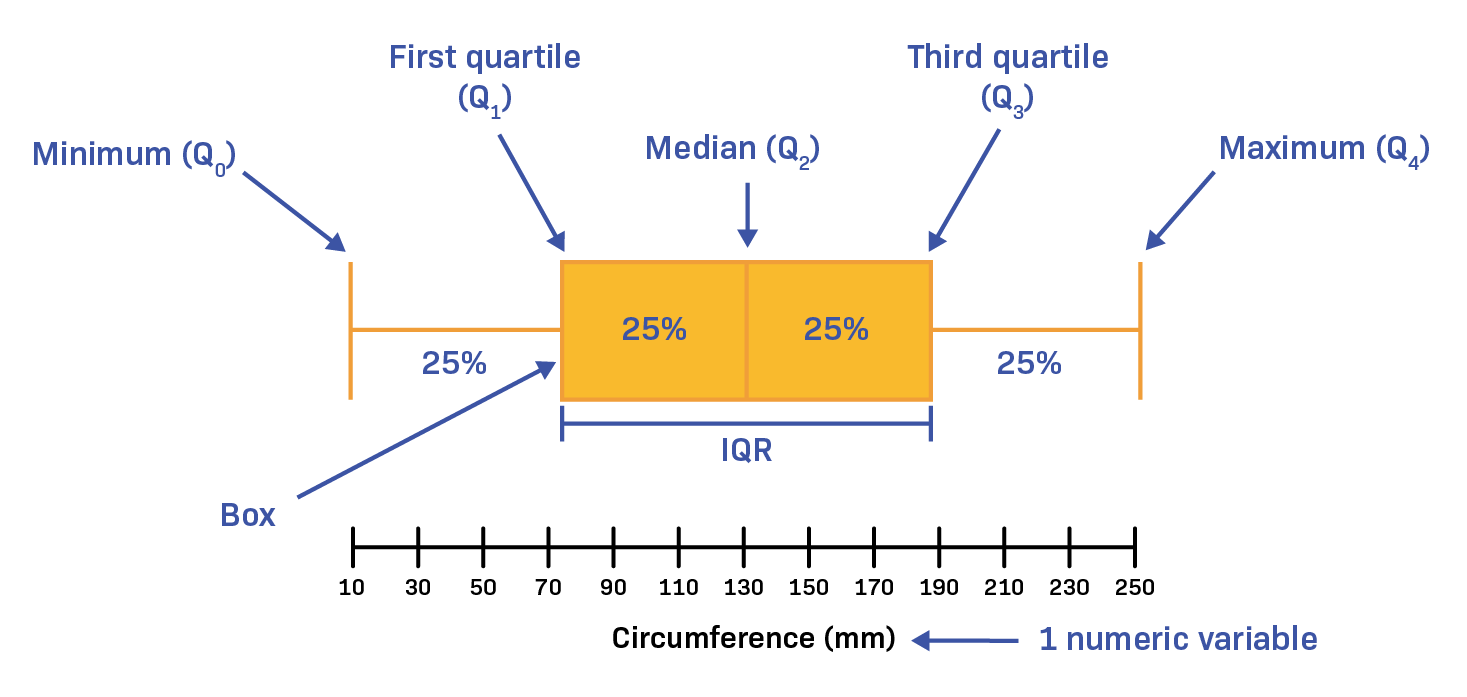

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [41]:
features = df.columns.tolist()
features.remove(features[0])

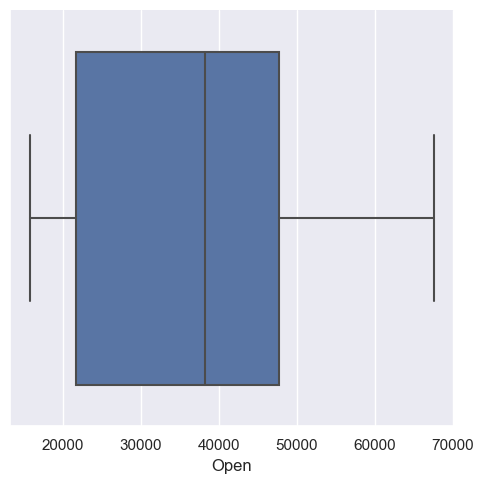

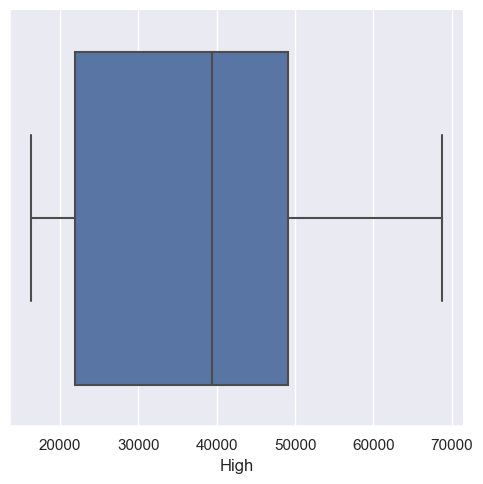

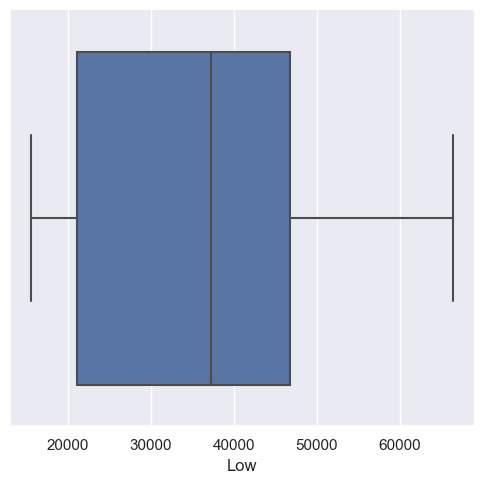

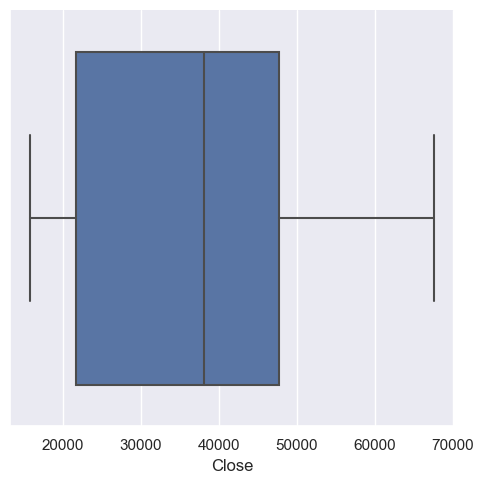

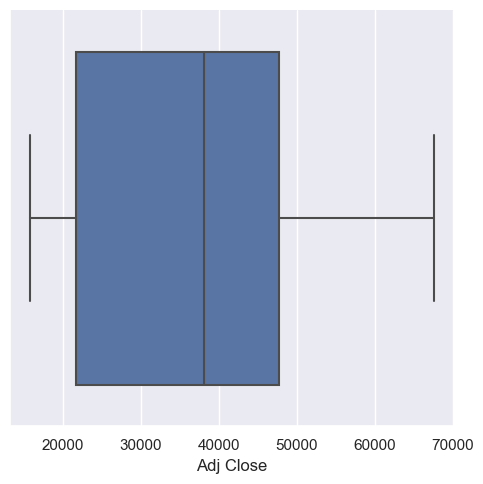

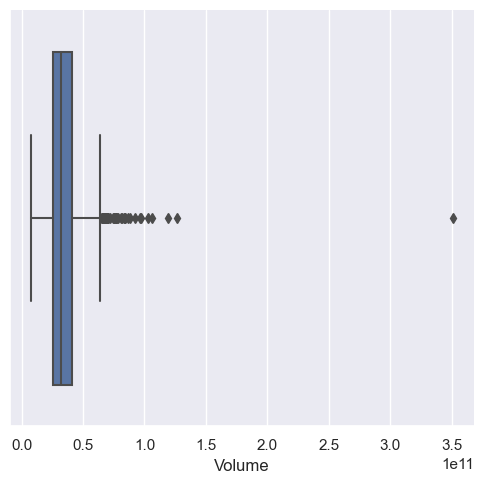

In [42]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

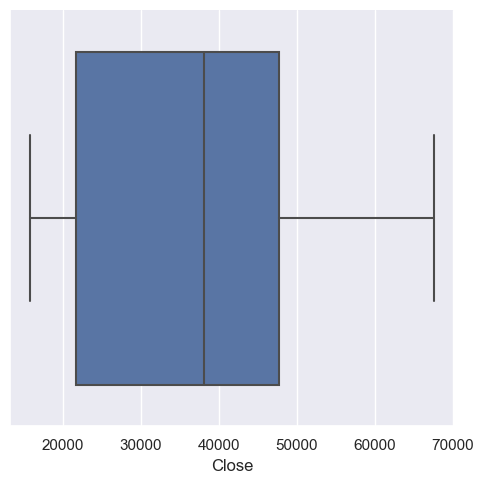

In [43]:
#for target variable
sns.catplot(data=df, x='Close', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Scatter Plot

In [47]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = 'Close',trendline = 'ols')
    
    figure.show()

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“. 

### Scatter Plot insight:

We can observe that all the variables except volume shows continous growth according to the close price of the currency.

## Why Scatter Plot?

Scatter plots are used in either of the following situations.

- When we have paired numerical data
- When there are multiple values of the dependent variable for a unique value of an independent variable
- In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

As we have to predict the Stock Price for the next day so we will not split the data.We will use the **autoTS** algorithm to predict a time series for the next 30 days.

# Step 3: Model Training

In [65]:
pip install autots

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10
Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generati

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegression in generation 0 of 10
Model Number: 57 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 60 with model NVAR in generation 0 of 10
Model Number: 61 with model Theta in generation 0 of 10


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 

Model Number: 138 with model SeasonalNaive in generation 0 of 10
Model Number: 139 with model NVAR in generation 0 of 10
Model Number: 140 with model SeasonalNaive in generation 0 of 10
Model Number: 141 with model UnobservedComponents in generation 0 of 10
Model Number: 142 with model LastValueNaive in generation 0 of 10
Model Number: 143 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 143: VAR
Model Number: 144 with model UnivariateMotif in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 146: VAR
Model Number: 147 with model GLS in generation 0 of 10
Model Number: 148 with model Theta in generation 0 of 10
Model Number: 149 with model UnivariateMotif in generation 0 of 10
Model Number: 150 with model UnivariateMotif in generation 0 of 10
Model Number: 151 with model Me

Model Number: 230 with model WindowRegression in generation 1 of 10
Model Number: 231 with model ETS in generation 1 of 10
Model Number: 232 with model GLS in generation 1 of 10
Model Number: 233 with model LastValueNaive in generation 1 of 10
Model Number: 234 with model GLS in generation 1 of 10
Model Number: 235 with model ARIMA in generation 1 of 10
Model Number: 236 with model MultivariateMotif in generation 1 of 10
Model Number: 237 with model ETS in generation 1 of 10
Model Number: 238 with model NVAR in generation 1 of 10
Model Number: 239 with model ARIMA in generation 1 of 10
Model Number: 240 with model AverageValueNaive in generation 1 of 10
Model Number: 241 with model LastValueNaive in generation 1 of 10
Model Number: 242 with model ETS in generation 1 of 10
Model Number: 243 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 244 with model ARDL in generation 1 of 10
Model Number: 245 with model UnobservedComponents in generation 1 of 10
Model Number: 246 with model UnivariateMotif in generation 1 of 10
Model Number: 247 with model ARIMA in generation 1 of 10
Model Number: 248 with model ETS in generation 1 of 10
Model Number: 249 with model GLM in generation 1 of 10
Model Number: 250 with model UnobservedComponents in generation 1 of 10
Model Number: 251 with model GLM in generation 1 of 10
Model Number: 252 with model GLS in generation 1 of 10
Model Number: 253 with model DatepartRegression in generation 1 of 10
Model Number: 254 with model LastValueNaive in generation 1 of 10
Model Number: 255 with model AverageValueNaive in generation 1 of 10
Model Number: 256 with model NVAR in generation 1 of 10
Model Number: 257 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 257: GLM
Model Number: 258

Model Number: 339 with model MultivariateMotif in generation 2 of 10
Model Number: 340 with model UnobservedComponents in generation 2 of 10
Model Number: 341 with model AverageValueNaive in generation 2 of 10
Model Number: 342 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 342: GLM
Model Number: 343 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('The feature names should match those that were passed during fit.\nFeature names seen at fit time, yet now missing:\n- seasonalitycommonfourier_26\n- seasonalitycommonfourier_27\n- seasonalitycommonfourier_28\n- seasonalitycommonfourier_29\n- seasonalitycommonfourier_30\n- ...\n') in model 343: DatepartRegression
Model Number: 344 with model MetricMotif in generation 2 of 10
Model Number: 345 with model LastValueNaive in generation 2 of 10
Model Number: 346 with model ARIMA in generation 2 of 10
Model Nu

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 437 with model NVAR in generation 2 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 438 with model ARDL in generation 2 of 10
New Generation: 3 of 10
Model Number: 439 with model UnobservedComponents in generation 3 of 10
Model Number: 440 with model UnivariateRegression in generation 3 of 10
Model Number: 441 with model LastValueNaive in generation 3 of 10
Model Number: 442 with model Theta in generation 3 of 10
Model Number: 443 with model ARDL in generation 3 of 10
Model Number: 444 with model LastValueNaive in generation 3 of 10
Model Number: 445 with model MultivariateMotif in generation 3 of 10
Model Number: 446 with model MetricMotif in generation 3 of 10
Model Number: 447 with model GLS in generation 3 of 10
Model Number: 448 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 448: ARDL
Model Number: 449 with model LastValueNaive in generation 3 of 10
Model Number: 450 with model UnivariateRegression in generation 3 of 10
Model Number: 451 with model Theta in g

Model Number: 547 with model NVAR in generation 3 of 10
Model Number: 548 with model WindowRegression in generation 3 of 10
Model Number: 549 with model MultivariateRegression in generation 3 of 10
Model Number: 550 with model MultivariateMotif in generation 3 of 10
Model Number: 551 with model LastValueNaive in generation 3 of 10
Model Number: 552 with model LastValueNaive in generation 3 of 10
Model Number: 553 with model Theta in generation 3 of 10
Model Number: 554 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 555 with model ARIMA in generation 3 of 10
Model Number: 556 with model SectionalMotif in generation 3 of 10
Model Number: 557 with model ARDL in generation 3 of 10
Model Number: 558 with model Theta in generation 3 of 10
Model Number: 55

Model Number: 655 with model SeasonalNaive in generation 4 of 10
Model Number: 656 with model UnobservedComponents in generation 4 of 10
Model Number: 657 with model SectionalMotif in generation 4 of 10
Model Number: 658 with model UnivariateMotif in generation 4 of 10
Model Number: 659 with model MultivariateMotif in generation 4 of 10
Model Number: 660 with model MetricMotif in generation 4 of 10
Model Number: 661 with model NVAR in generation 4 of 10
Model Number: 662 with model UnivariateMotif in generation 4 of 10
Model Number: 663 with model MultivariateMotif in generation 4 of 10
Model Number: 664 with model ARIMA in generation 4 of 10
Model Number: 665 with model ARIMA in generation 4 of 10
Model Number: 666 with model DatepartRegression in generation 4 of 10
Model Number: 667 with model AverageValueNaive in generation 4 of 10
Model Number: 668 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regresso

Model Number: 759 with model UnivariateMotif in generation 5 of 10
Model Number: 760 with model MultivariateMotif in generation 5 of 10
Model Number: 761 with model ARIMA in generation 5 of 10
Model Number: 762 with model NVAR in generation 5 of 10
Model Number: 763 with model ConstantNaive in generation 5 of 10
Model Number: 764 with model SeasonalNaive in generation 5 of 10
Model Number: 765 with model MultivariateMotif in generation 5 of 10
Model Number: 766 with model AverageValueNaive in generation 5 of 10
Model Number: 767 with model ARIMA in generation 5 of 10
Model Number: 768 with model SeasonalNaive in generation 5 of 10
Model Number: 769 with model SectionalMotif in generation 5 of 10
Model Number: 770 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 771 with model MultivariateMotif in generation 5 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 772 with model MultivariateMotif in generation 5 of 10
Model Number: 773 with model SectionalMotif in generation 5 of 10
Model Number: 774 with model ARDL in generation 5 of 10
Model Number: 775 with model LastValueNaive in generation 5 of 10
Model Number: 776 with model MultivariateRegression in generation 5 of 10
Model Number: 777 with model SectionalMotif in generation 5 of 10
Model Number: 778 with model NVAR in generation 5 of 10
Model Number: 779 with model AverageValueNaive in generation 5 of 10
Model Number: 780 with model ARIMA in generation 5 of 10
Model Number: 781 with model UnobservedComponents in generation 5 of 10
Model Number: 782 with model NVAR in generation 5 of 10
Model Number: 783 with model ETS in generation 5 of 10
Model Number: 784 with model DatepartRegression in generation 5 of 10
Model Number: 785 with model LastValueNaive in generation 5 of 10
Model Number: 786 with model NVAR in generation 5 of 10
Model Number: 787 with model MultivariateMotif

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 858 with model Theta in generation 6 of 10


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 859 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 859: UnobservedComponents
Model Number: 860 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 860: DatepartRegression
Model Number: 861 with model LastValueNaive in generation 6 of 10
Model Number: 862 with model Theta in generation 6 of 10
Model Number: 863 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 863: GLM
Model Number: 864 with model NVAR in generation 6 of 10
Model Number: 865 with model ARIMA in generation 6 of 10
Model Number: 866 with model MultivariateRegression in generation 6 of 10
Model Number: 867 with model GLS in generation 6 of 10
Model Number: 868 with model NVAR in generation 6 of 10
Model Number: 869 with model ARIMA in generati

Model Number: 965 with model WindowRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

Model Number: 966 with model NVAR in generation 7 of 10
Model Number: 967 with model UnobservedComponents in generation 7 of 10
Model Number: 968 with model ARDL in generation 7 of 10
Model Number: 969 with model Theta in generation 7 of 10
Model Number: 970 with model UnivariateMotif in generation 7 of 10
Model Number: 971 with model MultivariateMotif in generation 7 of 10
Model Number: 972 with model GLM in generation 7 of 10
Model Number: 973 with model NVAR in generation 7 of 10
Model Number: 974 with model Theta in generation 7 of 10
Model Number: 975 with model MetricMotif in generation 7 of 10
Model Number: 976 with model ARIMA in generation 7 of 10
Model Number: 977 with model GLM in generation 7 of 10
Model Number: 978 with model ARIMA in generation 7 of 10
Model Number: 979 with model WindowRegression in generation 7 of 10
Model Number: 980 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasibl

C:\Users\nuyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 1069 with model SeasonalNaive in generation 8 of 10
Model Number: 1070 with model LastValueNaive in generation 8 of 10
Model Number: 1071 with model UnivariateMotif in generation 8 of 10
Model Number: 1072 with model Theta in generation 8 of 10
Model Number: 1073 with model Theta in generation 8 of 10
Model Number: 1074 with model NVAR in generation 8 of 10
Model Number: 1075 with model MetricMotif in generation 8 of 10
Model Number: 1076 with model SeasonalNaive in generation 8 of 10
Model Number: 1077 with model UnivariateRegression in generation 8 of 10
Model Number: 1078 with model Theta in generation 8 of 10
Model Number: 1079 with model ETS in generation 8 of 10
Model Number: 1080 with model MultivariateRegression in generation 8 of 10
Model Number: 1081 with model WindowRegression in generation 8 of 10
Model Number: 1082 with model UnivariateMotif in generation 8 of 10
Model Number: 1083 with model ETS in generation 8 of 10
Model Number: 1084 with model ETS in gene

Model Number: 1167 with model ARIMA in generation 9 of 10
Model Number: 1168 with model MetricMotif in generation 9 of 10
Model Number: 1169 with model UnivariateMotif in generation 9 of 10
Model Number: 1170 with model UnobservedComponents in generation 9 of 10
Model Number: 1171 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1171: DatepartRegression
Model Number: 1172 with model MultivariateMotif in generation 9 of 10
Model Number: 1173 with model Theta in generation 9 of 10
Model Number: 1174 with model Theta in generation 9 of 10
Model Number: 1175 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1175: ARDL
Model Number: 1176 with model Theta in generation 9 of 10
Model Number: 1177 with model Theta in generation 9 of 10
Model Number: 1178 with model SectionalMotif in generation 9 of 10
Model

📈 1 - Ensemble with avg smape 19.66: 
Model Number: 2 of 188 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 18.6: 
Model Number: 3 of 188 with model Ensemble for Validation 1
3 - Ensemble with avg smape 19.39: 
Model Number: 4 of 188 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 10.67: 
Model Number: 5 of 188 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 9.45: 
Model Number: 6 of 188 with model Ensemble for Validation 1
6 - Ensemble with avg smape 25.2: 
Model Number: 7 of 188 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 30.92: 
Model Number: 8 of 188 with model LastValueNaive for Validation 1
8 - LastValueNaive with avg smape 30.92: 
Model Number: 9 of 188 with model Ensemble for Validation 1
9 - Ensemble with avg smape 30.99: 
Model Number: 10 of 188 with model LastValueNaive for Validation 1
10 - LastValueNaive with avg smape 31.11: 
Model Number: 11 of 188 with model LastValueNaive for Val

79 - UnivariateMotif with avg smape 33.82: 
Model Number: 80 of 188 with model MultivariateMotif for Validation 1
80 - MultivariateMotif with avg smape 33.78: 
Model Number: 81 of 188 with model ConstantNaive for Validation 1
81 - ConstantNaive with avg smape 33.78: 
Model Number: 82 of 188 with model MultivariateMotif for Validation 1
82 - MultivariateMotif with avg smape 33.78: 
Model Number: 83 of 188 with model MultivariateMotif for Validation 1
83 - MultivariateMotif with avg smape 33.78: 
Model Number: 84 of 188 with model SectionalMotif for Validation 1
84 - SectionalMotif with avg smape 33.78: 
Model Number: 85 of 188 with model UnivariateMotif for Validation 1
85 - UnivariateMotif with avg smape 33.78: 
Model Number: 86 of 188 with model UnivariateMotif for Validation 1
86 - UnivariateMotif with avg smape 33.78: 
Model Number: 87 of 188 with model UnivariateMotif for Validation 1
87 - UnivariateMotif with avg smape 33.78: 
Model Number: 88 of 188 with model ARIMA for Validatio

158 - GLM with avg smape 28.62: 
Model Number: 159 of 188 with model GLM for Validation 1
159 - GLM with avg smape 28.62: 
Model Number: 160 of 188 with model WindowRegression for Validation 1
📈 160 - WindowRegression with avg smape 3.27: 
Model Number: 161 of 188 with model WindowRegression for Validation 1
161 - WindowRegression with avg smape 3.27: 
Model Number: 162 of 188 with model GLM for Validation 1
162 - GLM with avg smape 31.25: 
Model Number: 163 of 188 with model AverageValueNaive for Validation 1
163 - AverageValueNaive with avg smape 16.85: 
Model Number: 164 of 188 with model WindowRegression for Validation 1
164 - WindowRegression with avg smape 9.99: 
Model Number: 165 of 188 with model AverageValueNaive for Validation 1
165 - AverageValueNaive with avg smape 14.84: 
Model Number: 166 of 188 with model AverageValueNaive for Validation 1
166 - AverageValueNaive with avg smape 14.83: 
Model Number: 167 of 188 with model WindowRegression for Validation 1
167 - WindowRegr

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


177 - DatepartRegression with avg smape 4.07: 
Model Number: 178 of 188 with model WindowRegression for Validation 1
178 - WindowRegression with avg smape 4.65: 
Model Number: 179 of 188 with model GLM for Validation 1
179 - GLM with avg smape 3.79: 
Model Number: 180 of 188 with model DatepartRegression for Validation 1
180 - DatepartRegression with avg smape 8.71: 
Model Number: 181 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 4.05: 
Model Number: 182 of 188 with model DatepartRegression for Validation 1
182 - DatepartRegression with avg smape 24.17: 
Model Number: 183 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


183 - DatepartRegression with avg smape 4.26: 
Model Number: 184 of 188 with model ConstantNaive for Validation 1
184 - ConstantNaive with avg smape 4.47: 
Model Number: 185 of 188 with model ConstantNaive for Validation 1
185 - ConstantNaive with avg smape 9.17: 
Model Number: 186 of 188 with model ConstantNaive for Validation 1
186 - ConstantNaive with avg smape 4.75: 
Model Number: 187 of 188 with model DatepartRegression for Validation 1
187 - DatepartRegression with avg smape 23.01: 
Model Number: 188 of 188 with model DatepartRegression for Validation 1
188 - DatepartRegression with avg smape 35.56: 
Validation Round: 2
Model Number: 1 of 188 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 30.09: 
Model Number: 2 of 188 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 27.71: 
Model Number: 3 of 188 with model Ensemble for Validation 2
3 - Ensemble with avg smape 28.41: 
Model Number: 4 of 188 with model Ensemble for Validation 2
📈 4 - Ensemble

73 - SectionalMotif with avg smape 41.95: 
Model Number: 74 of 188 with model MultivariateMotif for Validation 2
74 - MultivariateMotif with avg smape 41.95: 
Model Number: 75 of 188 with model NVAR for Validation 2
75 - NVAR with avg smape 41.95: 
Model Number: 76 of 188 with model ConstantNaive for Validation 2
76 - ConstantNaive with avg smape 41.95: 
Model Number: 77 of 188 with model MultivariateMotif for Validation 2
77 - MultivariateMotif with avg smape 41.95: 
Model Number: 78 of 188 with model GLS for Validation 2
78 - GLS with avg smape 41.95: 
Model Number: 79 of 188 with model UnivariateMotif for Validation 2
79 - UnivariateMotif with avg smape 41.95: 
Model Number: 80 of 188 with model MultivariateMotif for Validation 2
80 - MultivariateMotif with avg smape 41.95: 
Model Number: 81 of 188 with model ConstantNaive for Validation 2
81 - ConstantNaive with avg smape 41.95: 
Model Number: 82 of 188 with model MultivariateMotif for Validation 2
82 - MultivariateMotif with avg s

151 - GLS with avg smape 8.65: 
Model Number: 152 of 188 with model GLS for Validation 2
152 - GLS with avg smape 8.65: 
Model Number: 153 of 188 with model GLM for Validation 2
153 - GLM with avg smape 41.95: 
Model Number: 154 of 188 with model ConstantNaive for Validation 2
154 - ConstantNaive with avg smape 41.24: 
Model Number: 155 of 188 with model GLM for Validation 2
155 - GLM with avg smape 45.31: 
Model Number: 156 of 188 with model GLS for Validation 2
156 - GLS with avg smape 17.55: 
Model Number: 157 of 188 with model GLM for Validation 2
157 - GLM with avg smape 2.16: 
Model Number: 158 of 188 with model GLM for Validation 2
158 - GLM with avg smape 41.04: 
Model Number: 159 of 188 with model GLM for Validation 2
159 - GLM with avg smape 41.04: 
Model Number: 160 of 188 with model WindowRegression for Validation 2
📈 160 - WindowRegression with avg smape 1.79: 
Model Number: 161 of 188 with model WindowRegression for Validation 2
161 - WindowRegression with avg smape 1.79:

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


177 - DatepartRegression with avg smape 3.28: 
Model Number: 178 of 188 with model WindowRegression for Validation 2
178 - WindowRegression with avg smape 2.2: 
Model Number: 179 of 188 with model GLM for Validation 2
179 - GLM with avg smape 2.27: 
Model Number: 180 of 188 with model DatepartRegression for Validation 2
180 - DatepartRegression with avg smape 5.88: 
Model Number: 181 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 3.05: 
Model Number: 182 of 188 with model DatepartRegression for Validation 2
182 - DatepartRegression with avg smape 46.36: 
Model Number: 183 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


183 - DatepartRegression with avg smape 2.36: 
Model Number: 184 of 188 with model ConstantNaive for Validation 2
184 - ConstantNaive with avg smape 2.57: 
Model Number: 185 of 188 with model ConstantNaive for Validation 2
185 - ConstantNaive with avg smape 13.59: 
Model Number: 186 of 188 with model ConstantNaive for Validation 2
186 - ConstantNaive with avg smape 2.62: 
Model Number: 187 of 188 with model DatepartRegression for Validation 2
187 - DatepartRegression with avg smape 16.6: 
Model Number: 188 of 188 with model DatepartRegression for Validation 2
188 - DatepartRegression with avg smape 42.95: 
Validation Round: 3
Model Number: 1 of 188 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 25.62: 
Model Number: 2 of 188 with model Ensemble for Validation 3
2 - Ensemble with avg smape 36.7: 
Model Number: 3 of 188 with model Ensemble for Validation 3
3 - Ensemble with avg smape 37.42: 
Model Number: 4 of 188 with model Ensemble for Validation 3
4 - Ensemble with

73 - SectionalMotif with avg smape 34.91: 
Model Number: 74 of 188 with model MultivariateMotif for Validation 3
74 - MultivariateMotif with avg smape 34.91: 
Model Number: 75 of 188 with model NVAR for Validation 3
75 - NVAR with avg smape 34.91: 
Model Number: 76 of 188 with model ConstantNaive for Validation 3
76 - ConstantNaive with avg smape 34.91: 
Model Number: 77 of 188 with model MultivariateMotif for Validation 3
77 - MultivariateMotif with avg smape 34.91: 
Model Number: 78 of 188 with model GLS for Validation 3
78 - GLS with avg smape 34.91: 
Model Number: 79 of 188 with model UnivariateMotif for Validation 3
79 - UnivariateMotif with avg smape 34.91: 
Model Number: 80 of 188 with model MultivariateMotif for Validation 3
80 - MultivariateMotif with avg smape 34.91: 
Model Number: 81 of 188 with model ConstantNaive for Validation 3
81 - ConstantNaive with avg smape 34.91: 
Model Number: 82 of 188 with model MultivariateMotif for Validation 3
82 - MultivariateMotif with avg s

📈 151 - GLS with avg smape 6.97: 
Model Number: 152 of 188 with model GLS for Validation 3
152 - GLS with avg smape 6.97: 
Model Number: 153 of 188 with model GLM for Validation 3
153 - GLM with avg smape 34.91: 
Model Number: 154 of 188 with model ConstantNaive for Validation 3
154 - ConstantNaive with avg smape 37.86: 
Model Number: 155 of 188 with model GLM for Validation 3
155 - GLM with avg smape 39.11: 
Model Number: 156 of 188 with model GLS for Validation 3
156 - GLS with avg smape 80.27: 
Model Number: 157 of 188 with model GLM for Validation 3
157 - GLM with avg smape 7.15: 
Model Number: 158 of 188 with model GLM for Validation 3
158 - GLM with avg smape 37.61: 
Model Number: 159 of 188 with model GLM for Validation 3
159 - GLM with avg smape 37.62: 
Model Number: 160 of 188 with model WindowRegression for Validation 3
160 - WindowRegression with avg smape 10.15: 
Model Number: 161 of 188 with model WindowRegression for Validation 3
161 - WindowRegression with avg smape 10.1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


177 - DatepartRegression with avg smape 7.49: 
Model Number: 178 of 188 with model WindowRegression for Validation 3
178 - WindowRegression with avg smape 7.51: 
Model Number: 179 of 188 with model GLM for Validation 3
179 - GLM with avg smape 7.14: 
Model Number: 180 of 188 with model DatepartRegression for Validation 3
180 - DatepartRegression with avg smape 7.57: 
Model Number: 181 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 181 - DatepartRegression with avg smape 6.79: 
Model Number: 182 of 188 with model DatepartRegression for Validation 3
182 - DatepartRegression with avg smape 55.97: 
Model Number: 183 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 183 - DatepartRegression with avg smape 6.59: 
Model Number: 184 of 188 with model ConstantNaive for Validation 3
184 - ConstantNaive with avg smape 7.18: 
Model Number: 185 of 188 with model ConstantNaive for Validation 3
185 - ConstantNaive with avg smape 14.56: 
Model Number: 186 of 188 with model ConstantNaive for Validation 3
186 - ConstantNaive with avg smape 7.23: 
Model Number: 187 of 188 with model DatepartRegression for Validation 3
187 - DatepartRegression with avg smape 16.87: 
Model Number: 188 of 188 with model DatepartRegression for Validation 3
188 - DatepartRegression with avg smape 37.91: 
              Close
2023-02-15  22220.8
2023-02-16  22220.8
2023-02-17  22220.8
2023-02-18  22220.8
2023-02-19  22220.8
2023-02-20  22220.8
2023-02-21  22220.8
2023-02-22  22220.8
2023-02-23  22220.8
2023-02-24  22220.8
2023-02-25  22220.8
2023-02-26  22220.8
2023-02-27  22220.8
2023-02-28  22220.8
2023-03-01  22220.8
2023-03-02  22220.8
2023-03-03  22220.8
2023-03-04  22220.8
202

In [68]:
forecast

,Close
2023-02-15,22220.8
2023-02-16,22220.8
2023-02-17,22220.8
2023-02-18,22220.8
2023-02-19,22220.8
2023-02-20,22220.8
2023-02-21,22220.8
2023-02-22,22220.8
2023-02-23,22220.8
2023-02-24,22220.8


In [69]:
r = model.results()
v_r = model.results("validation")


In [70]:
v_r    

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,imle_weighted,spl_weighted,maxe_weighted,oda_weighted,dwae_weighted,mqae_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score
0,0023da1c2f1b3f843eb031d7d884e32f,LastValueNaive,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,200.000000,22564.038216,22578.985425,3.536490,...,10.023482,76.370917,23774.566406,0.033333,1295.080373,22366.790781,0.000000,0.533333,0.01500,1087.470855
1,005b8d27de2ef7c5da7fd85f116bea26,MetricMotif,"{""window"": 5, ""point_method"": ""midhinge"", ""dis...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0,1,2.854579,639.675131,862.345527,1.336767,...,449.961845,2.111378,2191.029191,0.966667,23.335112,427.677298,0.000000,0.600000,0.03430,37.213342
2,005ffe3470db726b71a9a973b77bcc9d,Theta,"{""deseasonalize"": true, ""difference"": false, ""...","{""fillna"": ""mean"", ""transformations"": {""0"": ""D...",0,1,11.364326,2437.308162,2618.934503,1.207391,...,10.315213,5.843928,3600.499029,0.033333,152.363845,2216.482130,1.000000,0.466667,0.18900,94.671103
3,007302c31a67ae53d401fe1b7d5ed71b,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,17.959179,3731.339498,3832.497460,1.607902,...,8.192166,15.557841,5024.536539,0.033333,222.212272,3516.603156,1.000000,0.500000,0.08800,160.233194
4,008b083605243e6109128f6d0d270ca0,Theta,"{""deseasonalize"": true, ""difference"": false, ""...","{""fillna"": ""mean"", ""transformations"": {""0"": ""D...",0,1,10.825217,2329.082103,2503.166147,1.205843,...,10.833539,6.071070,3463.581966,0.033333,145.627531,2114.236334,1.000000,0.466667,0.08970,92.594687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,fea8bb24a39d10105058034e0c26c215,ARIMA,"{""p"": 0, ""d"": 1, ""q"": 1, ""regression_type"": ""H...","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0,1,8.345317,1822.079156,2003.580062,1.195312,...,8.674089,5.852283,3039.534981,0.066667,116.558053,1623.446194,1.000000,0.566667,0.56060,78.494167
1112,ff5f14ade85b3ee961bd8d8fa5911f21,UnivariateMotif,"{""window"": 10, ""point_method"": ""median"", ""dist...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0,1,200.000000,22564.038691,22578.985881,3.536490,...,10.023482,76.370919,23774.566504,0.033333,1295.080396,22366.791343,0.000000,0.433333,0.03660,1088.341927
1113,ff65e1f4afd0c459972e90468340257f,LastValueNaive,{},"{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,3.005082,674.261920,947.948782,1.358807,...,575.330361,2.282127,2348.379247,0.966667,25.004242,431.998611,0.000000,0.566667,0.03700,39.148268
1114,ff9f79590f27662371638f235efb68d7,GLS,{},"{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,4,6.838259,1293.248094,1610.691069,0.886936,...,200.634062,4.760415,4293.763599,0.425000,64.201783,1013.829233,0.991667,0.491667,0.13365,65.642618


In [72]:
af = pd.DataFrame({
    'Model':v_r['Model'],
    'Rmse_Score':v_r['rmse'],
    'Score':v_r['Score']
})
print(min(v_r['rmse']))

811.1035156696408


In [74]:
df2=af.query('Rmse_Score == 811.1035156696408')['Model']
print(df2)


print(min(af['Rmse_Score']))

774    MetricMotif
Name: Model, dtype: object
811.1035156696408


In [76]:
import pickle
pickle.dump(model , open('CryptocurrencyPrediction.pkl', 'wb'))

### Insight:
The RMSE score of MetricMotif model was the least so the model which is best suited for our problem is MetricMotif model.

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in predicting the price of the cryptocurrency for the next 30 days.   